In [1]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Step 2: Load the Dataset
# Make sure 'housing.csv' is in the same directory as your notebook
data = pd.read_csv('Boston.csv')

# Display the first 5 rows
data.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
# Step 3: Explore the Dataset
print("\nShape of the dataset:", data.shape)
print("\nColumns in dataset:\n", data.columns)

# Check if any null values
print("\nMissing values:\n", data.isnull().sum())



Shape of the dataset: (506, 15)

Columns in dataset:
 Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

Missing values:
 Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


In [11]:
# Show column names
print("\nAvailable columns:")
print(list(data.columns))




Available columns:
['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


In [13]:
# Step 4: Prepare the Data (Features and Target)

# Usually 'MEDV' is the target (if your file matches the Boston dataset)
X = data.drop('medv', axis=1)
y = data['medv']

print("\nInput features shape:", X.shape)
print("Target variable shape:", y.shape)



Input features shape: (506, 14)
Target variable shape: (506,)


In [14]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Step 6: Feature Scaling (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Step 7: Build the Deep Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Single output for Regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Step 8: Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [18]:
# Step 9: Train the Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 620.2061 - mae: 23.0392 - val_loss: 521.1672 - val_mae: 21.2267
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 590.7828 - mae: 22.2872 - val_loss: 480.9018 - val_mae: 20.2167
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 565.3086 - mae: 21.6259 - val_loss: 429.9968 - val_mae: 18.8934
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 464.0047 - mae: 19.3474 - val_loss: 364.2637 - val_mae: 17.0669
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 408.4714 - mae: 17.6290 - val_loss: 282.7434 - val_mae: 14.6983
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 274.8625 - mae: 14.3667 - val_loss: 196.5169 - val_mae: 11.8570
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 184.0707 - mae: 10.8646 - val_loss: 120.7951 - val_mae: 8.5650
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 135.6547 - mae: 8.8049 - val_loss: 73.1493 - val_mae: 6.1592
Epoch 9/100
11

In [19]:
# Step 10: Evaluate the Model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.5976 - mae: 2.2617

Test Mean Absolute Error (MAE): 2.37


In [22]:
# Step 11: Predicting New Values
y_pred = model.predict(X_test)

# Compare first 8 predictions with actual values
pd.DataFrame({'Actual': y_test.values[:8], 'Predicted': y_pred[:8].flatten()})

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


,Actual,Predicted
0,23.6,27.780987
1,32.4,33.484531
2,13.6,17.533173
3,22.8,27.480141
4,16.1,16.307163
5,20.0,20.544525
6,17.8,14.604556
7,14.0,14.165144


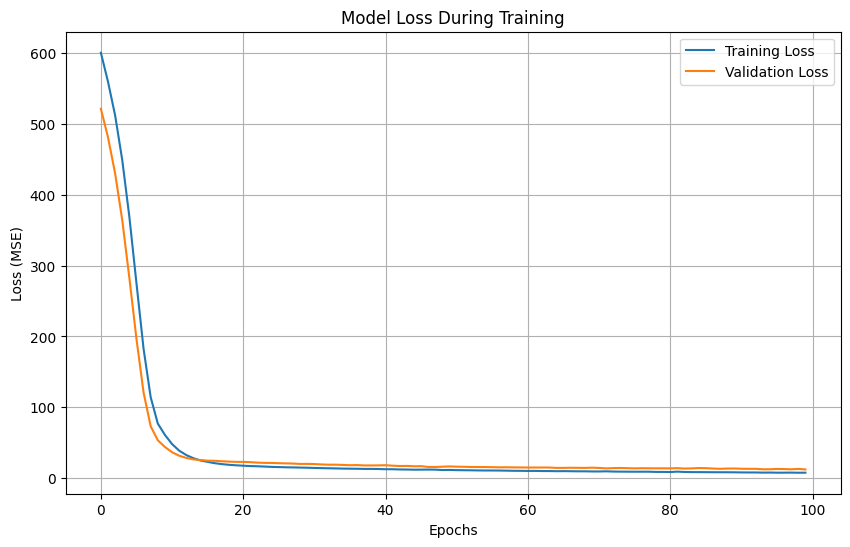

In [21]:
# Step 12: Plotting Training History (Loss vs Epochs)
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()